In [1]:
import pandas as pd


data = pd.read_csv('6400.csv')
data.head()

,產品名稱,廠商名稱,遊戲平台,級別,情節,上市日期
0,Ultima I: The First Age of Darkness,Electronic Arts Asia Pacific Pte Ltd,PC單機,輔15,暴力,1981-07-09
1,Ultima II: The Revenge of the Enchantress,Electronic Arts Asia Pacific Pte Ltd,PC單機,輔15,暴力,1982-08-24
2,Ultima III: Exodus,Electronic Arts Asia Pacific Pte Ltd,PC單機,輔15,暴力,1983-08-23
3,Ultima IV: Quest of the Avatar,Electronic Arts Asia Pacific Pte Ltd,PC單機,輔15,暴力,1985-09-16
4,Starflight™ 1,Electronic Arts Asia Pacific Pte Ltd,PC單機,輔15,暴力,1986-08-15


In [2]:
#1 作品中有涉及到任何情節的資料有哪些?


# 篩選符合條件的資料
notSafe_data = data[data['情節'] != '未涉及任何情節']

# 顯示篩選後的資料
notSafe_data

###已知11119筆資料中篩選出下列共7604筆資料涉及不當情節，由此可知多數遊戲願意在遊戲中加入暴力、不當言語等情節，
###可知這些情節在遊戲中扮演著非常重要的角色，為遊戲體驗增加刺激感與即時快感。

,產品名稱,廠商名稱,遊戲平台,級別,情節,上市日期
0,Ultima I: The First Age of Darkness,Electronic Arts Asia Pacific Pte Ltd,PC單機,輔15,暴力,1981-07-09
1,Ultima II: The Revenge of the Enchantress,Electronic Arts Asia Pacific Pte Ltd,PC單機,輔15,暴力,1982-08-24
2,Ultima III: Exodus,Electronic Arts Asia Pacific Pte Ltd,PC單機,輔15,暴力,1983-08-23
3,Ultima IV: Quest of the Avatar,Electronic Arts Asia Pacific Pte Ltd,PC單機,輔15,暴力,1985-09-16
4,Starflight™ 1,Electronic Arts Asia Pacific Pte Ltd,PC單機,輔15,暴力,1986-08-15
...,...,...,...,...,...,...
11214,方舟計劃,姚博文,PC單機,輔12,暴力,2020-01-01
11215,The Escapists 2,Team17 Digital Ltd.,XboxOne,輔12,暴力,2026-06-01
11216,Yooka-Laylee,Team17 Digital Ltd.,XboxOne,護,暴力,2050-12-01
11217,Aven Colony,Team17 Digital Ltd.,XboxOne,輔12,不當言語,2050-12-01


In [3]:
#2 上述資料中哪個平台涉及不當情節的作品佔的比例最高?

# 計算不同遊戲平台的涉及情節資料筆數
platform_notSafe_counts = notSafe_data['遊戲平台'].value_counts()

# 計算不同遊戲平台的全部資料筆數
platform_all_counts = data['遊戲平台'].value_counts()

# 計算不同遊戲平台的涉及情節資料筆數占該平台全部資料筆數的比例
platform_ratios = platform_notSafe_counts / platform_all_counts

# 轉換百分比(四捨五入到小數點第二位)
platform_ratios = platform_ratios * 100
platform_ratios = platform_ratios.round(2)

# 將結果按比率大小排序
platform_ratios = platform_ratios.sort_values(ascending=False)

# 轉換字串並加上百分比符號
platform_ratios = platform_ratios.apply(lambda x: str(x) + '%')

# 顯示結果
platform_ratios

###從下列資料可以發現近乎所有平台的涉及不當情節之作品都大於50%，只有當時強調闔家的已淘汰主機(wii/ps3)是低於50%，
###再次驗證不當情節對於遊戲設計之必要性，既然情節不可避免，那涉及情節的輕重廠商會怎麼取捨呢?

PC線上         81.55%
PSVITA       81.53%
psp           80.0%
PS4          79.15%
PS3          78.35%
Xbox360      75.56%
PSN           75.0%
PC單機         72.73%
XboxOne      72.55%
Switch       71.19%
N3DS         68.66%
WEB          67.67%
Xbox         62.79%
其他           58.61%
PS2          55.21%
WiiU         53.85%
NDS          52.63%
PSP          52.55%
手機遊戲         52.17%
Xbox Live     50.0%
Wii          44.86%
ps3          44.83%
Name: 遊戲平台, dtype: object

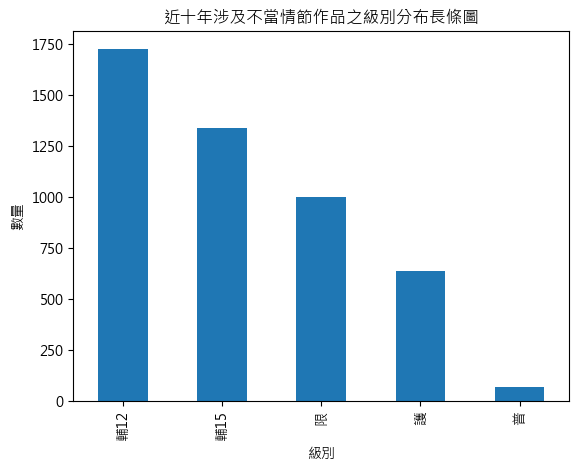

In [85]:
#3 近十年涉及不當情節作品的級別分布是如何?

# 設定指定年份範圍
start_year = 2013
end_year = 2023

# 篩選出 "上市日期" 在指定年份範圍內的資料
# 這邊因為格式是yyyy-mm-dd，所以用.str[:4]取前4個yyyy，並用.astype(int)轉換字元陣列為整數型態
recentWorks = notSafe_data[notSafe_data['上市日期'].str[:4].astype(int).between(start_year, end_year)]

# import matplotlib套件，並設定字體為微軟正黑體
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Microsoft JhengHei'] 

# 繪製 "級別" 的長條圖(設定x軸、y軸、標題與繪製類別)
recentWorks['級別'].value_counts().plot(kind='bar')
plt.xlabel('級別')
plt.ylabel('數量')
plt.title('近十年涉及不當情節作品之級別分布長條圖')
plt.show()

###從下列圖示化可以發現多數廠商選擇將作品設計在輔12~15的範圍內，既滿足情節需求，也不會做的過度
###接下來，我想知道隨著時間趨近現代，是否有不當情節作品愈發出現的趨勢

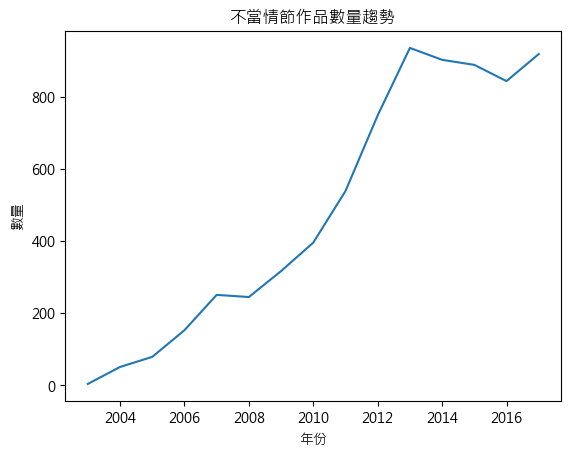

In [26]:
#4 隨著時間過去，是否有越來越多不當情節作品誕生?

# 設定指定年份範圍(因此資料為幾年前的資料，2018後為預先申請，故不納入)
start_year = 2003
end_year = 2017

# 篩選出指定年份範圍內的資料
recentWorks = notSafe_data[notSafe_data['上市日期'].str[:4].astype(int).between(start_year, end_year)]

# 計算每年的資料數量
count_by_year = recentWorks.groupby(recentWorks['上市日期'].str[:4].astype(int))['上市日期'].count()

# 繪製年份對資料數量的折線圖
count_by_year.plot()
plt.xlabel('年份')
plt.ylabel('數量')
plt.title('不當情節作品數量趨勢')
plt.show()

###可以看見自2008起，不當情節作品數量驟然上升，當然這可能與當時遊戲極快速的發展有關，不過已經可以看見趨勢
###那麼這些趨勢又是趨於哪個種類的情節呢?

Defaulting to user installation because normal site-packages is not writeable


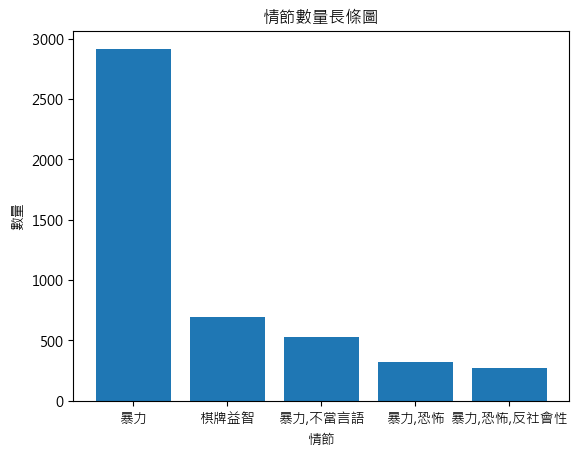

In [60]:
#5 不當情節作品中的情節分布為何?

# 使用另一個繪圖套件(plotly)
!pip install plotly
import plotly.graph_objs as go

# 讀取 csv 檔案，篩選所有涉及不當情節的作品
data2 = pd.read_csv('6400.csv')
data2 = data2[data2['情節'] != '未涉及任何情節']

# 計算每種情節出現的次數
count_by_scenario_data2 = data2['情節'].value_counts()

# 將計數結果轉換為 DataFrame
count_data2 = pd.DataFrame(count_by_scenario_data2, columns=['情節'])
count_data2.reset_index(inplace=True)
count_data2.rename(columns={'情節': '數量'}, inplace=True)
count_data2.rename(columns={'index': '情節'}, inplace=True)

#我們取前5個分類來看看
top5_data = count_data2.sort_values(by='數量', ascending=False).head(5)

# 繪製長條圖
plt.bar(top5_data['情節'], top5_data['數量'])
plt.title('情節數量長條圖')
plt.xlabel('情節')
plt.ylabel('數量')
plt.show()

###如下圖可以很明顯得發現暴力情節遠大於其他情節
###不過擁有複數情節的都被分出去了，若把擁有複數情節的作品同時算入複數單一情節來計算，會是如何呢?

In [70]:
#6 以單一情節看不當情節作品中的情節分布為何?

# 讀取 csv 檔案，篩選所有涉及不當情節的作品
data2 = pd.read_csv('6400.csv')
data2 = data2[data2['情節'] != '未涉及任何情節']

# 由於一個作品可能含有複數不當情節，所以我們將情節欄位的字串分割為多個子字串
data2['情節'] = data2['情節'].str.split(',')

# 計算每種情節出現的次數
count_by_scenario_data2 = data2['情節'].explode().value_counts()

# 印出結果
print(count_by_scenario_data2)

###成功把擁有複數情節的作品分類後，可以很清晰地看見各類別的數量
###為了更精確、更視覺化的分析，接下來希望能把數據轉換成百分比後繪圖

暴力         6032
不當言語       1490
性          1279
恐怖         1078
棋牌益智        812
反社會性        768
虛擬戀愛或結婚     743
菸酒          579
毒品          137
未涉及任何情節       1
Name: 情節, dtype: int64


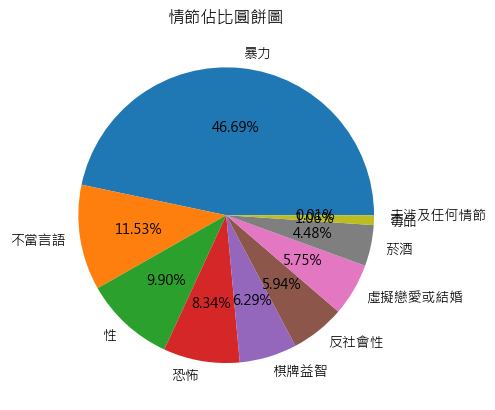

In [77]:
#7 將不當情節作品以單一情節分類後，所佔的比例為何?

# 上一個問題的結果
data2 = pd.read_csv('6400.csv')
data2 = data2[data2['情節'] != '未涉及任何情節']
data2['情節'] = data2['情節'].str.split(',')
count_by_scenario_data2 = data2['情節'].explode().value_counts()

# 計算每種情節所佔的百分比

percent_by_scenario_data2 = count_by_scenario_data2 / count_by_scenario_data2.sum()
percent_by_scenario_data2

# 繪製圓餅圖，並將百分比格式化至小數點後 2 位
plt.pie(percent_by_scenario_data2, labels=percent_by_scenario_data2.index, autopct='%.2f%%')

# 設定標題
plt.title('情節佔比圓餅圖')

plt.show()

###圖示化後可以很清晰的得到"近半數作品選擇加入暴力元素"這個結論
###看完了不當情節作品，也想來看看未涉及不當情節作品在近幾年的趨勢

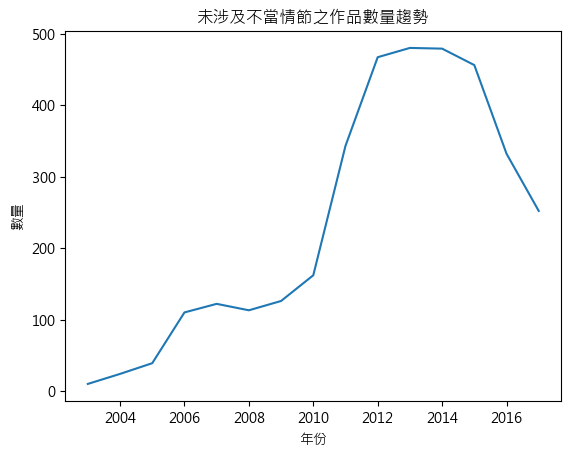

In [82]:
#8 未涉及不當情節作品於近幾年的數量趨勢?

# 讀取 csv 檔案，篩選所有未涉及不當情節的作品
data3 = pd.read_csv('6400.csv')
data3 = data3[data3['情節'] == '未涉及任何情節']

# 設定指定年份範圍(因此資料為幾年前的資料，2018後為預先申請，故不納入)
start_year = 2003
end_year = 2017

# 篩選出 "上市日期" 在指定年份範圍內的資料
recentWorks = data3[data3['上市日期'].str[:4].astype(int).between(start_year, end_year)]

# 計算每年的資料數量
count_by_year = recentWorks.groupby(recentWorks['上市日期'].str[:4].astype(int))['上市日期'].count()

# 繪製年份對資料數量的折線圖
count_by_year.plot()
plt.xlabel('年份')
plt.ylabel('數量')
plt.title('未涉及不當情節之作品數量趨勢')
plt.show()

###可以看見在2010年後一樣有飛升的情況，這個現象待最後分析
###先來看未涉及不當情節作品對於級別而言是否合乎想像

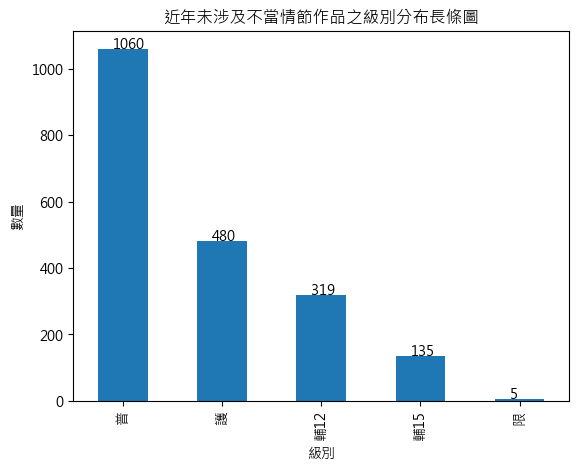

In [87]:
#9 未涉及不當情節作品的級別分布為何?

# 設定指定年份範圍
start_year = 2013
end_year = 2017

# 篩選出 "上市日期" 在指定年份範圍內的資料
recentWorks = data3[data3['上市日期'].str[:4].astype(int).between(start_year, end_year)]

# 計算數量(用以顯示在長條圖)
recentWorks_counts = recentWorks['級別'].value_counts()

# 繪製長條圖
fig = recentWorks_counts.plot(kind='bar')

for i, v in enumerate(recentWorks_counts):
    fig.text(i - 0.1, v + 1, str(v))
    
plt.xlabel('級別')
plt.ylabel('數量')
plt.title('近年未涉及不當情節作品之級別分布長條圖')
plt.show()

###未涉及不當情節作品確實多是屬於普級，然而其他等級的加總也逼近普級的數量，可見刺激性的內容對遊戲的影響力之大
###最後，我想疊圖分析涉及不當情節與否的兩方作品在數量上的趨勢

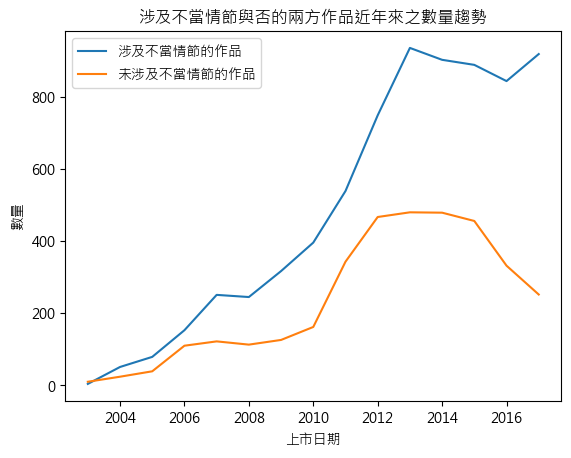

In [92]:
#10 涉及不當情節與否的兩方作品近年來在數量上的趨勢?

# 設定指定年份範圍
start_year = 2003
end_year = 2017

#篩選近年來所有涉及不當情節的作品
data2 = pd.read_csv('6400.csv')
data2 = data2[data2['情節'] != '未涉及任何情節']
recentWorks_data2 = data2[data2['上市日期'].str[:4].astype(int).between(start_year, end_year)]

#篩選近年來所有未涉及不當情節的作品
data3 = pd.read_csv('6400.csv')
data3 = data3[data3['情節'] == '未涉及任何情節']
recentWorks_data3 = data3[data3['上市日期'].str[:4].astype(int).between(start_year, end_year)]

# 計算兩者每年的資料數量
count_by_year_data2 = recentWorks_data2.groupby(recentWorks_data2['上市日期'].str[:4].astype(int))['上市日期'].count()
count_by_year_data3 = recentWorks_data3.groupby(recentWorks_data3['上市日期'].str[:4].astype(int))['上市日期'].count()

#繪製疊圖
plt.plot(count_by_year_data2, label='涉及不當情節的作品')
plt.plot(count_by_year_data3, label='未涉及不當情節的作品')

plt.title('涉及不當情節與否的兩方作品近年來之數量趨勢')
plt.xlabel('上市日期')
plt.ylabel('數量')

#設定圖例
plt.legend()
plt.show()

###透過展示兩條折線可以很明確地發現兩件事實
###一、自2010年起，無論是哪方作品都有數量飛升的情況，意即自該時間點，遊戲產業進入爆發期，註冊的數量越來越多
###二、幾乎在任何時間點，有涉及不當情節的作品幾乎都多於另一方，再次驗證刺激性內容才是主流